In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

from tqdm import tqdm


**Loading EMNIST training dataset**

In [2]:
train_df = pd.read_csv('emnist-balanced-train.csv', header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_df.shape

(112800, 785)

**Split train dataframe into X & y**

In [4]:
X_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]

X_train.shape, y_train.shape

((112800, 784), (112800,))

In [5]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y_train.head()

0    45
1    36
2    43
3    15
4     4
Name: 0, dtype: int64

***Create label dictionary***

In [7]:
label_map = pd.read_csv("emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)

In [8]:
label_map.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

**After mapping**

In [9]:
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

**Visualize sample data**

In [10]:
# Sample entry number 43
sample_image = X_train.iloc[43]
sample_label = y_train.iloc[43]
sample_image.shape, sample_label

((784,), 22)

In [11]:
W = 28 ##image width and height size 
H = 28

Label entry 43: M


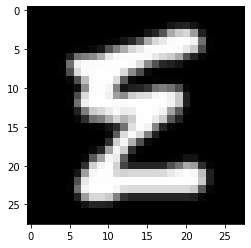

In [12]:
print("Label entry 43:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(W, H), cmap=plt.cm.gray)
plt.show()

Label entry 43: M


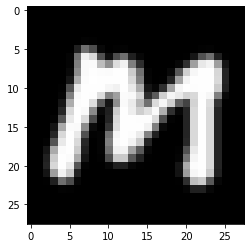

In [13]:
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry 43:", label_dictionary[sample_label])
plt.imshow(reshape_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()


**Next we want to apply reshape_and_rotate to all images in X_train**

In [14]:
# np.apply_along_axis returns a numpy array
X_train = np.apply_along_axis(reshape_and_rotate, 1, X_train.values)
X_train.shape

(112800, 28, 28)

**Visualizing more sample**

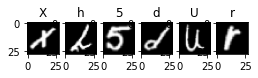

In [15]:
for i in range(100, 106):
    plt.subplot(390 + (i+1))
    plt.imshow(X_train[i], cmap=plt.cm.gray)
    plt.title(label_dictionary[y_train[i]])

**Normalize Data**

In [16]:
X_train = X_train.astype('float32') / 255 ##converting the img pixels to normalized value                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [17]:
number_of_classes = y_train.nunique()
number_of_classes ##number of unique calsses

47

In [18]:
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_train.shape

(112800, 47)

In [19]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
# Reshape to fit model input shape
# Tensorflow (batch, width, height, channels)
X_train = X_train.reshape(-1, W, H, 1)
X_train.shape

(112800, 28, 28, 1)

In [22]:
# Split 10% validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size= 0.1, 
                                                  random_state=88)

**Model**

In [23]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(W, H, 1)))

model.add(layers.MaxPool2D(strides=2))

model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='sigmoid'))

model.add(layers.MaxPool2D(strides=2))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(84, activation='relu'))

model.add(layers.Dense(number_of_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               307456    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [24]:
optimizer_name = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [25]:
history = model.fit(X_train,
                    y_train, 
                    epochs=30, 
                    batch_size=32, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[early_stopping, mcp_save])

Epoch 1/30
2570/2570 [==============================] - 80s 31ms/step - loss: 0.9444 - accuracy: 0.7114 - val_loss: 0.5437 - val_accuracy: 0.8153

Epoch 00001: val_loss improved from inf to 0.54365, saving model to my_model.h5
Epoch 2/30
2570/2570 [==============================] - 81s 32ms/step - loss: 0.4753 - accuracy: 0.8352 - val_loss: 0.4378 - val_accuracy: 0.8420

Epoch 00002: val_loss improved from 0.54365 to 0.43782, saving model to my_model.h5
Epoch 3/30
2570/2570 [==============================] - 83s 32ms/step - loss: 0.4067 - accuracy: 0.8551 - val_loss: 0.4139 - val_accuracy: 0.8542

Epoch 00003: val_loss improved from 0.43782 to 0.41391, saving model to my_model.h5
Epoch 4/30
2570/2570 [==============================] - 89s 35ms/step - loss: 0.3671 - accuracy: 0.8671 - val_loss: 0.4204 - val_accuracy: 0.8509

Epoch 00004: val_loss did not improve from 0.41391
Epoch 5/30
2570/2570 [==============================] - 82s 32ms/step - loss: 0.3384 - accuracy: 0.8764 - val_los

In [26]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

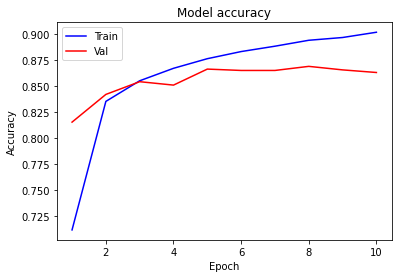

In [28]:
# Accuracy curve
plotgraph(epochs, acc, val_acc)

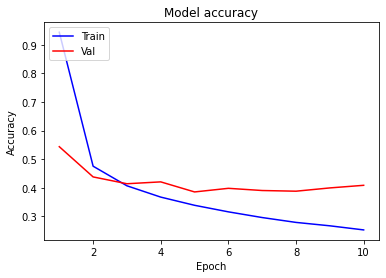

In [30]:
# loss curve
plotgraph(epochs, loss, val_loss)

**Test model**

In [31]:
# Load best model
model = load_model('my_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               307456    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [32]:
y_pred = model.predict(X_val)
y_pred.shape

(10152, 47)

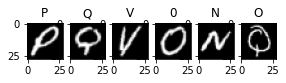

In [33]:
for i in range(10, 16):
    plt.subplot(380 + (i%10+1))
    plt.imshow(X_val[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

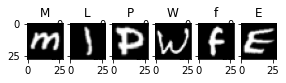

In [34]:
for i in range(42, 48):
    plt.subplot(380 + (i%10+1))
    plt.imshow(X_val[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(label_dictionary[y_pred[i].argmax()])

**Test accuracy**

In [35]:
model.evaluate(X_val, y_val)

318/318 [==============================] - 2s 7ms/step - loss: 0.3903 - accuracy: 0.8657


[0.39029407501220703, 0.8657407164573669]

**Load test dataset & preprocess image like how we did to train dataset**

In [38]:
test_df = pd.read_csv('emnist-balanced-test.csv', header=None)
test_df.shape

(18800, 785)

In [39]:
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,18800.000000,18800.0,18800.0,18800.0,18800.0,18800.000000,18800.000000,18800.000000,18800.000000,18800.000000,...,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0,18800.0
mean,23.000000,0.0,0.0,0.0,0.0,0.006064,0.019734,0.011277,0.009362,0.011277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,13.565021,0.0,0.0,0.0,0.0,0.528828,1.761298,1.054441,0.892318,1.517275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,11.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,23.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,35.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,46.000000,0.0,0.0,0.0,0.0,63.000000,213.000000,108.000000,95.000000,208.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_test = test_df.loc[:, 1:]
y_test = test_df.loc[:, 0]

X_test.shape, y_test.shape

((18800, 784), (18800,))

In [41]:
X_test = np.apply_along_axis(reshape_and_rotate, 1, X_test.values)
y_test = np_utils.to_categorical(y_test, number_of_classes)

X_test.shape, y_test.shape

((18800, 28, 28), (18800, 47))

**Normalize Again**

In [42]:
X_test = X_test.astype('float32') / 255

In [43]:
X_test = X_test.reshape(-1, W, H, 1)
X_test.shape

(18800, 28, 28, 1)

In [44]:
model.evaluate(X_test, y_test)

588/588 [==============================] - 4s 7ms/step - loss: 0.4089 - accuracy: 0.8624


[0.40888839960098267, 0.8623936176300049]